#### Quick Starter code to estimate the pose - type of workout - currently supporting the pushup,squats classification, counting the repeatations

The below code is tested on google colab

#### Installing all the required packages

In [1]:
!pip install pillow==8.1.0
!pip install matplotlib==3.3.4
!pip install numpy==1.19.3
!pip install opencv-python==4.5.1.48
!pip install tqdm==4.56.0
!pip install requests==2.25.1

!pip install mediapipe==0.8.3

     |████████████████████████████████| 2.2 MB 4.7 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 11.5 MB 12 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 14.9 MB 94 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 50.4 MB 15 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 72 kB 724 kB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
     |████████████████████████████████| 61 kB 3.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently tak

In [35]:
#folder structure for uploading training samples
from google.colab import files
import os

uploaded = files.upload()
os.listdir('.')

Saving fitness_poses_images_in.zip to fitness_poses_images_in.zip


['.config',
 'fitness_poses_csvs_out55',
 'sqauts.mp4',
 'fitness_poses_images_in_sq77',
 'fitness_poses_images_out999',
 'fitness_poses_images_out44',
 'fitness_poses_images_in_sq000',
 'fitness_poses_images_in.zip',
 'fitness_poses_csvs_out99',
 'squats-sample-out.mov',
 'fitness_poses_images_in_sq66.zip',
 'fitness_poses_images_in_sq0000.zip',
 '.ipynb_checkpoints',
 'sample_data']

Unzip the archive:

In [37]:
import zipfile
import io

zf = zipfile.ZipFile(io.BytesIO(uploaded['fitness_poses_images_in.zip']), "r")
zf.extractall()
os.listdir('.')

['.config',
 'fitness_poses_csvs_out55',
 'sqauts.mp4',
 'fitness_poses_images_in_sq77',
 'fitness_poses_images_out999',
 'fitness_poses_images_in',
 'fitness_poses_images_out44',
 'fitness_poses_images_in_sq000',
 'fitness_poses_images_in.zip',
 'fitness_poses_csvs_out99',
 'squats-sample-out.mov',
 'fitness_poses_images_in_sq66.zip',
 'fitness_poses_images_in_sq0000.zip',
 '.ipynb_checkpoints',
 'sample_data']

## Bootstrap images

In [38]:
# Required structure of the images_in_folder:
#
#   fitness_poses_images_in/
#     pushups_up/
#       image_001.jpg
#       image_002.jpg
#       ...
#     pushups_down/
#       image_001.jpg
#       image_002.jpg
#       ...
#     ...

#folders to store the training data such as pushups_up/pushups_down/squats_up/squats_down
bootstrap_images_in_folder = 'fitness_poses_images_in'

# Output folders for bootstrapped images and CSVs & landmark positions.
bootstrap_images_out_folder = 'fitness_poses_images_out'
bootstrap_csvs_out_folder = 'fitness_poses_csvs_out'

In [39]:
# Initialize helper.
bootstrap_helper = BootstrapHelper(
    images_in_folder=bootstrap_images_in_folder,
    images_out_folder=bootstrap_images_out_folder,
    csvs_out_folder=bootstrap_csvs_out_folder,
)

In [40]:
# Check how many pose classes and images for them are available.
bootstrap_helper.print_images_in_statistics()

Number of images per pose class:
  pushups_down: 83
  pushups_up: 82


In [41]:
# Bootstrap all images.
# Set limit to some small number for debug.
bootstrap_helper.bootstrap(per_pose_class_limit=None)

Bootstrapping  pushups_down
100%|██████████| 83/83 [00:11<00:00,  7.38it/s]
Bootstrapping  pushups_up
100%|██████████| 82/82 [00:11<00:00,  7.24it/s]


In [42]:
# Check how many images were bootstrapped.
bootstrap_helper.print_images_out_statistics()

Number of images per pose class:
  pushups_down: 83
  pushups_up: 82


In [43]:
# After initial bootstrapping images without detected poses were still saved in
# the folderd (but not in the CSVs) for debug purpose. Let's remove them.
bootstrap_helper.align_images_and_csvs(print_removed_items=False)
bootstrap_helper.print_images_out_statistics()

Number of images per pose class:
  pushups_down: 81
  pushups_up: 80


In [45]:
# Find outliers in the training datasets.

# Transforms pose landmarks into embedding.
pose_embedder = FullBodyPoseEmbedder()

# Classifies give pose against database of poses.
pose_classifier = PoseClassifier(
    pose_samples_folder=bootstrap_csvs_out_folder,
    pose_embedder=pose_embedder,
    top_n_by_max_distance=30,
    top_n_by_mean_distance=10)

outliers = pose_classifier.find_pose_sample_outliers()
print('Number of outliers: ', len(outliers))

Number of outliers:  11


Outlier
  sample path =     fitness_poses_images_out/pushups_down/d10.jpg
  sample class =    pushups_down
  detected class =  ['pushups_up']
  all classes =     {'pushups_down': 4, 'pushups_up': 6}


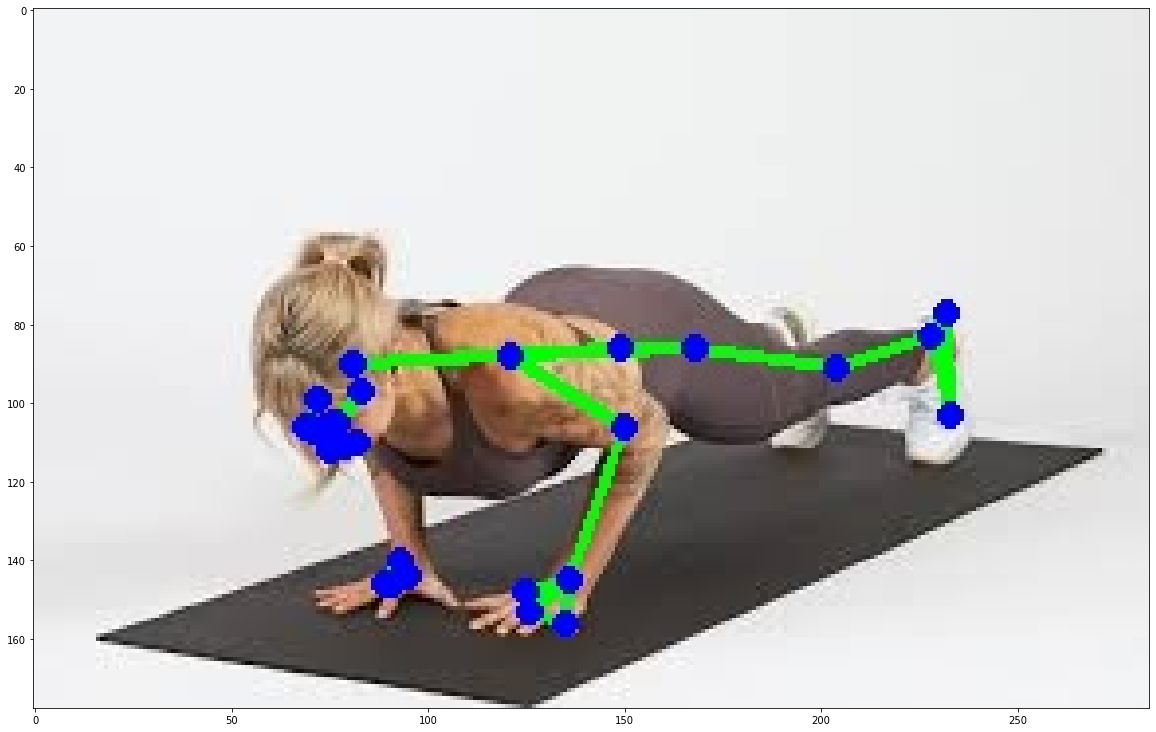

Outlier
  sample path =     fitness_poses_images_out/pushups_down/d17.jpg
  sample class =    pushups_down
  detected class =  ['pushups_up']
  all classes =     {'pushups_down': 3, 'pushups_up': 7}


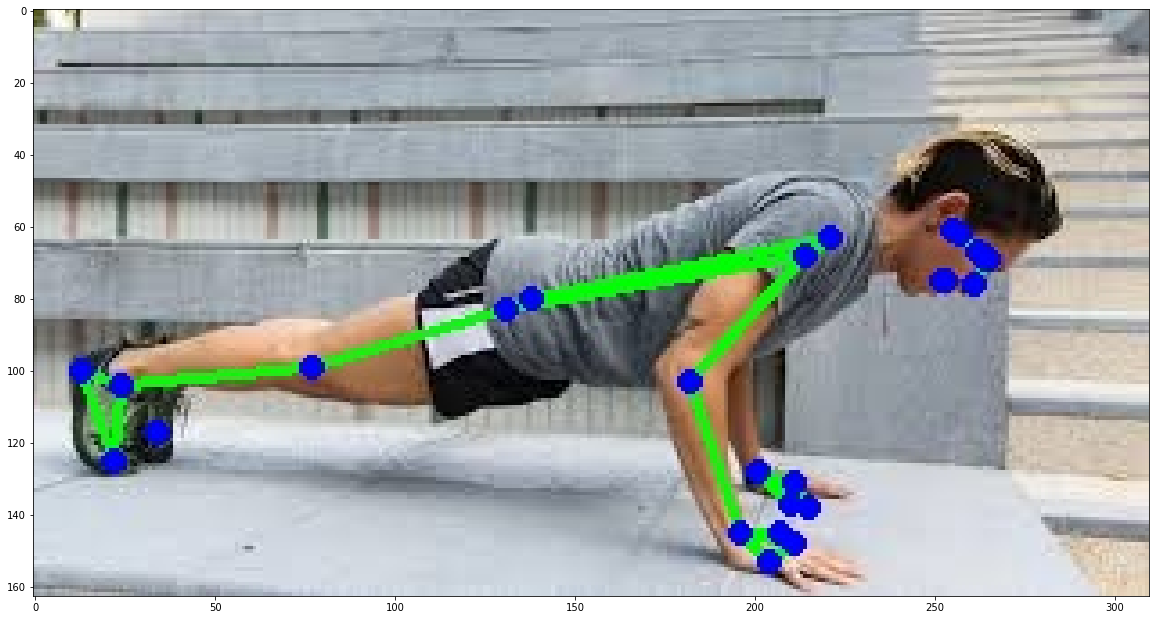

Outlier
  sample path =     fitness_poses_images_out/pushups_down/d32.jpg
  sample class =    pushups_down
  detected class =  ['pushups_down', 'pushups_up']
  all classes =     {'pushups_down': 5, 'pushups_up': 5}


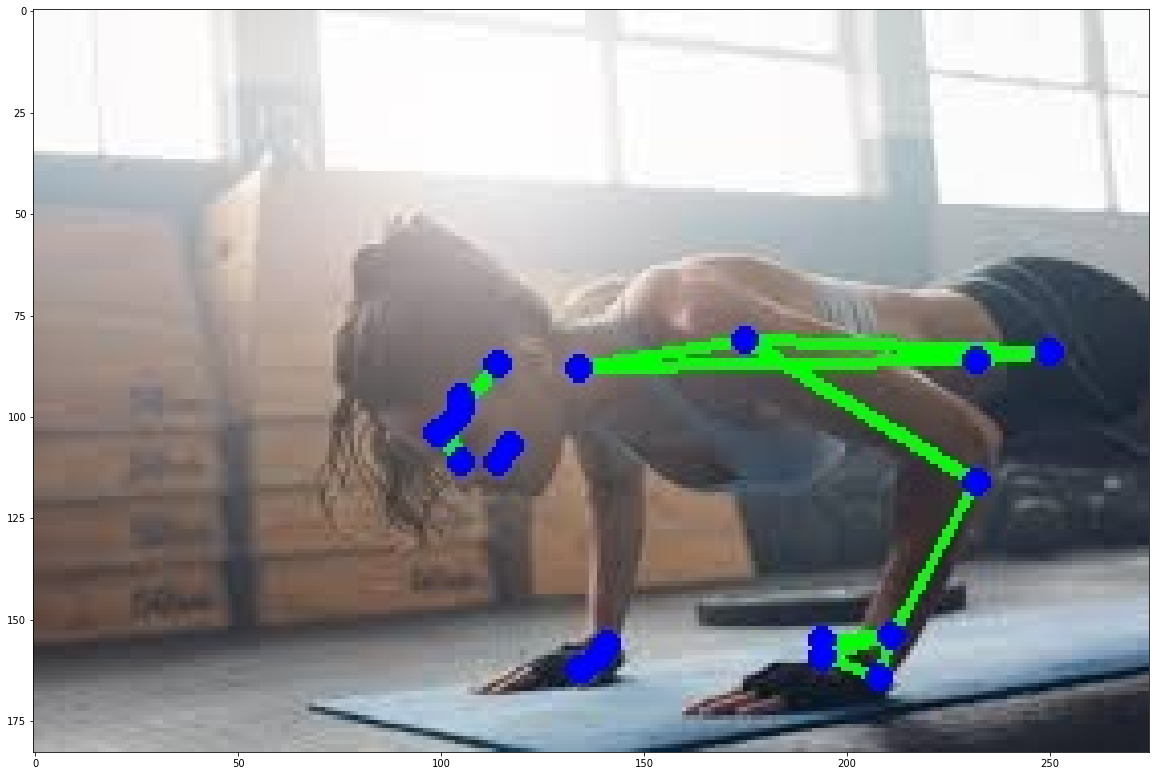

Outlier
  sample path =     fitness_poses_images_out/pushups_down/d52.jpg
  sample class =    pushups_down
  detected class =  ['pushups_down', 'pushups_up']
  all classes =     {'pushups_down': 5, 'pushups_up': 5}


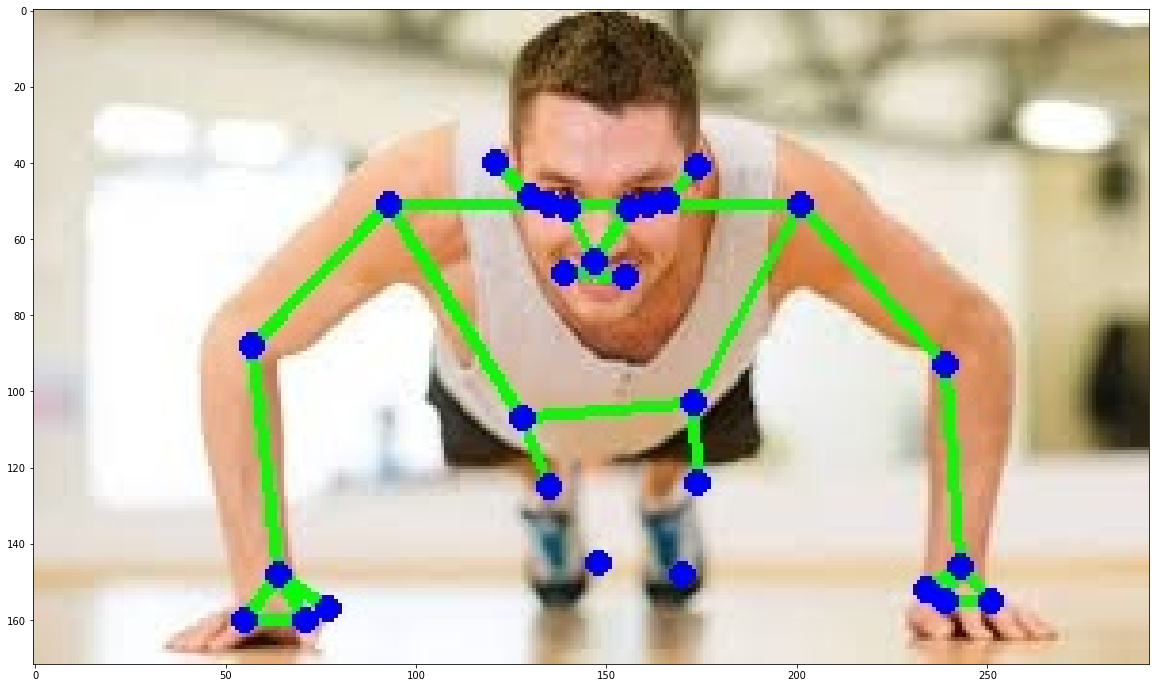

Outlier
  sample path =     fitness_poses_images_out/pushups_down/d59.jpg
  sample class =    pushups_down
  detected class =  ['pushups_up']
  all classes =     {'pushups_down': 2, 'pushups_up': 8}


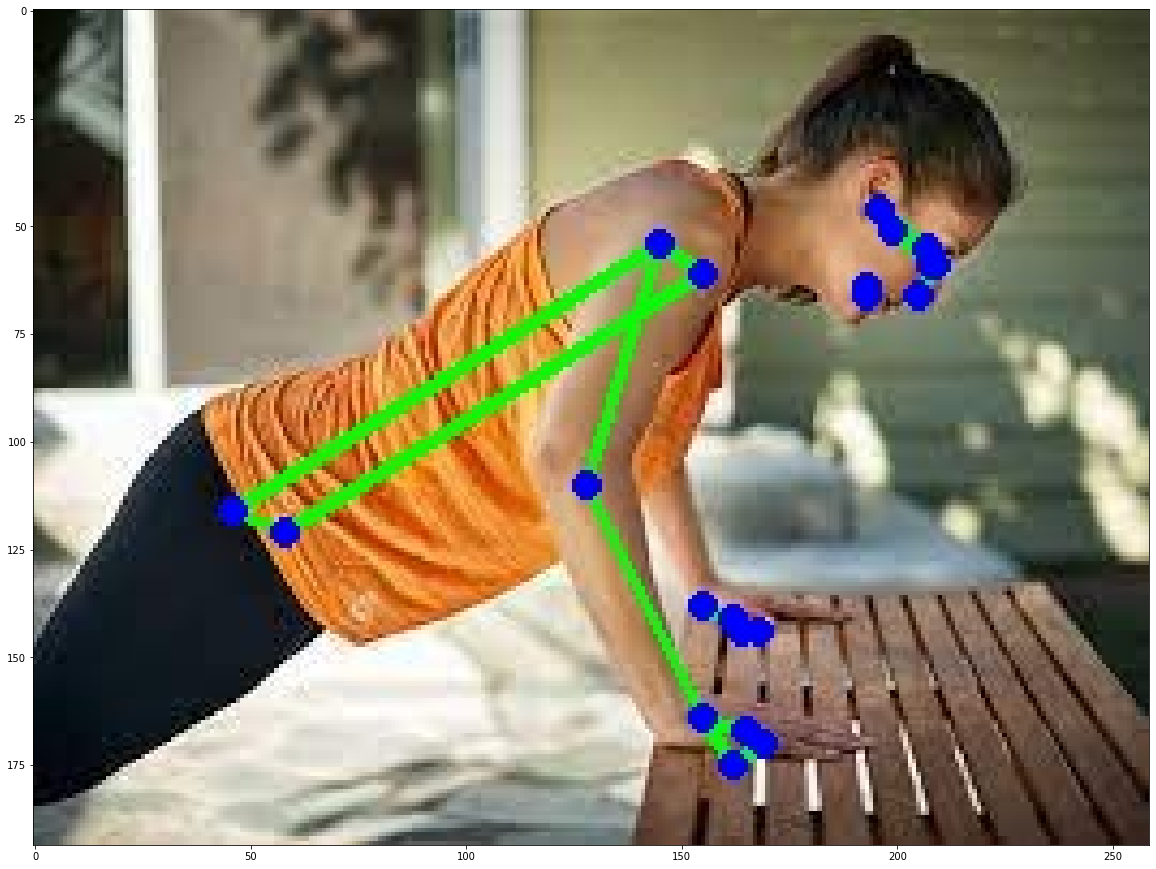

Outlier
  sample path =     fitness_poses_images_out/pushups_down/d73.jpg
  sample class =    pushups_down
  detected class =  ['pushups_down', 'pushups_up']
  all classes =     {'pushups_down': 5, 'pushups_up': 5}


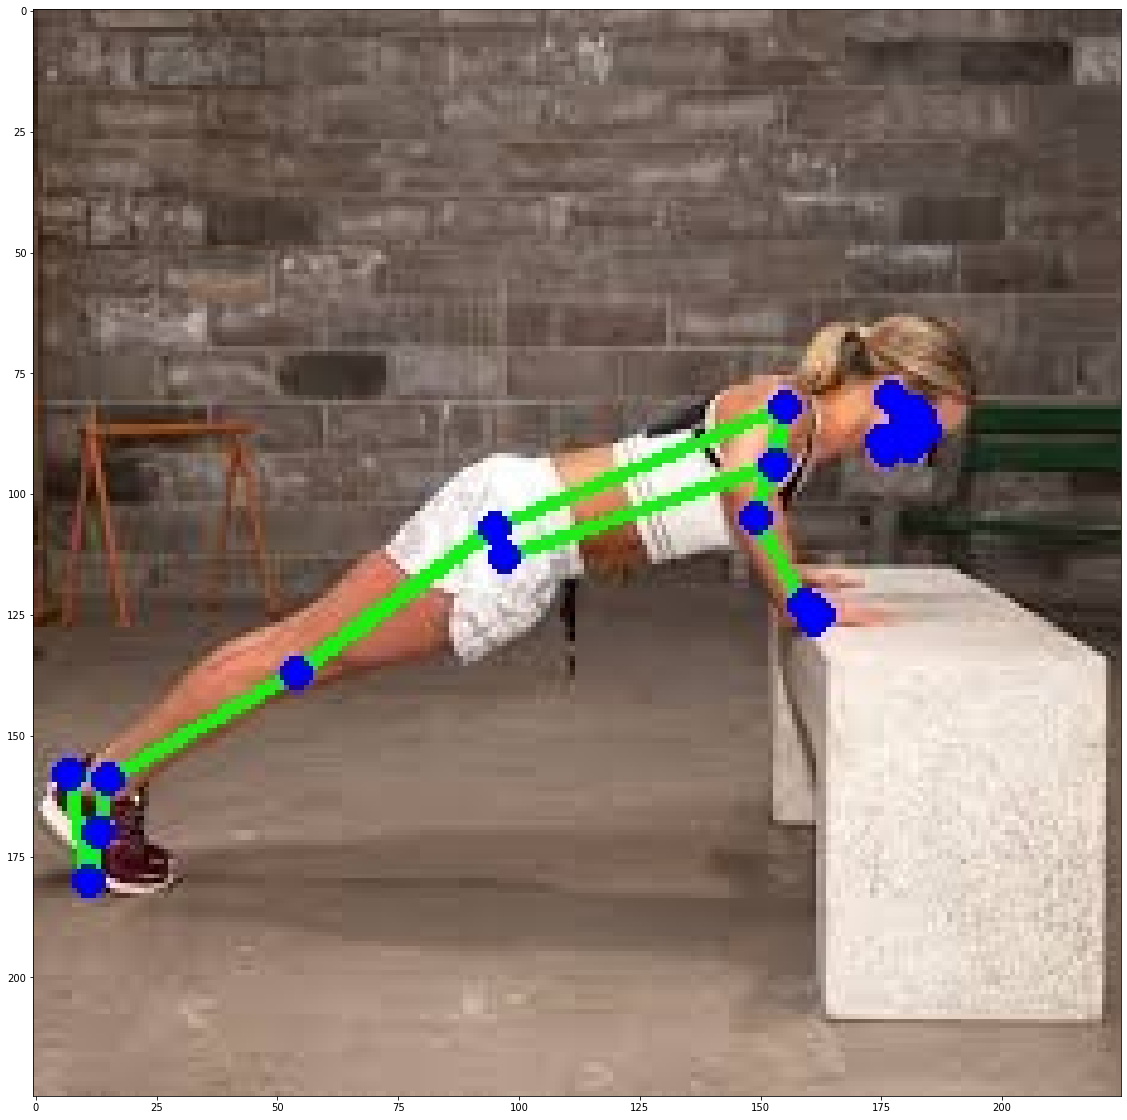

Outlier
  sample path =     fitness_poses_images_out/pushups_up/u14.jpg
  sample class =    pushups_up
  detected class =  ['pushups_down']
  all classes =     {'pushups_down': 7, 'pushups_up': 3}


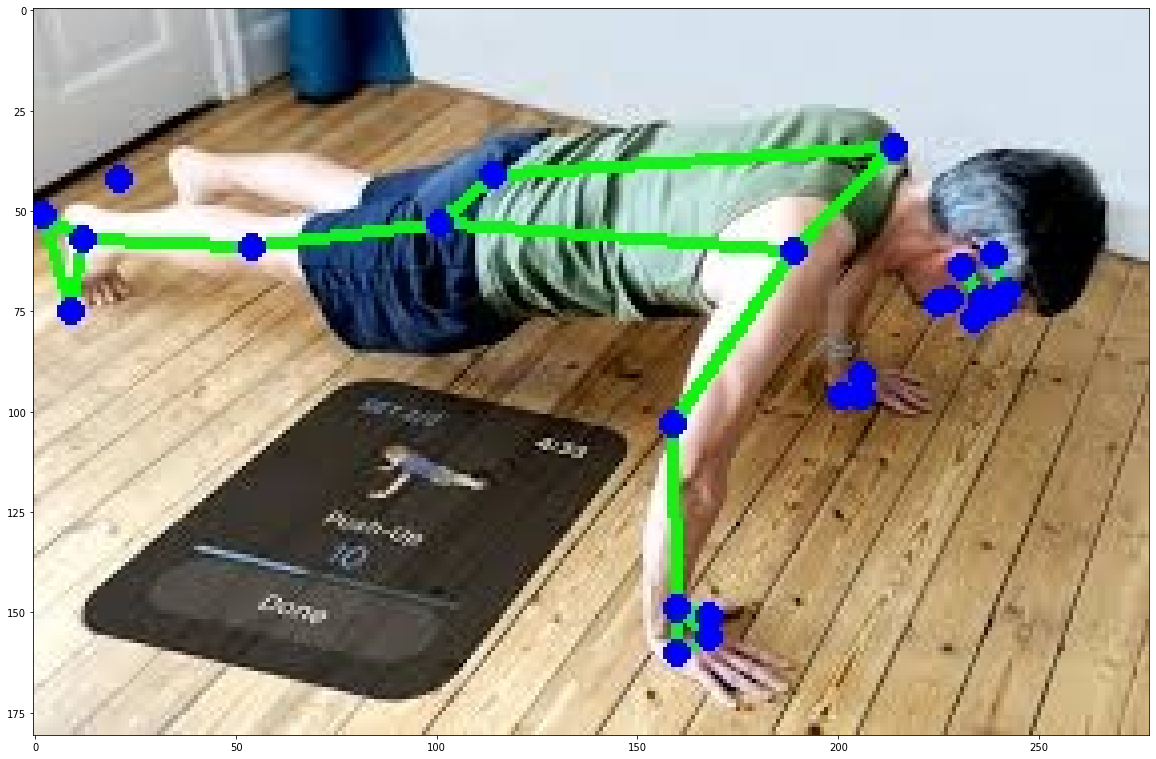

Outlier
  sample path =     fitness_poses_images_out/pushups_up/u58.jpg
  sample class =    pushups_up
  detected class =  ['pushups_down', 'pushups_up']
  all classes =     {'pushups_down': 5, 'pushups_up': 5}


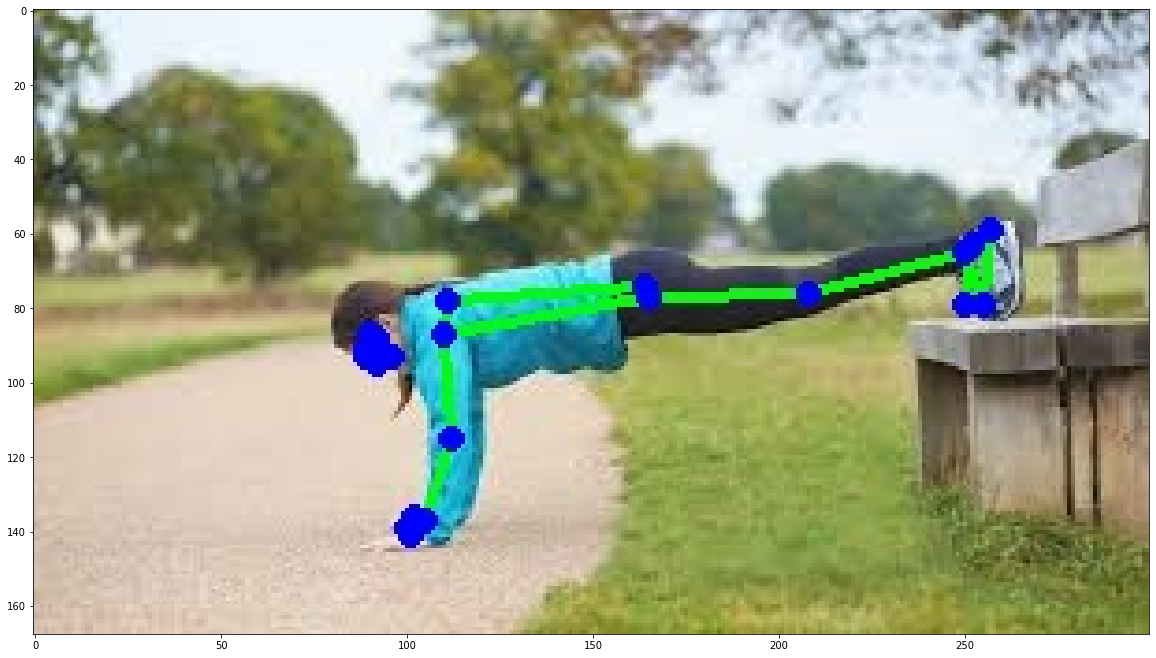

Outlier
  sample path =     fitness_poses_images_out/pushups_up/u60.jpg
  sample class =    pushups_up
  detected class =  ['pushups_down']
  all classes =     {'pushups_down': 6, 'pushups_up': 4}


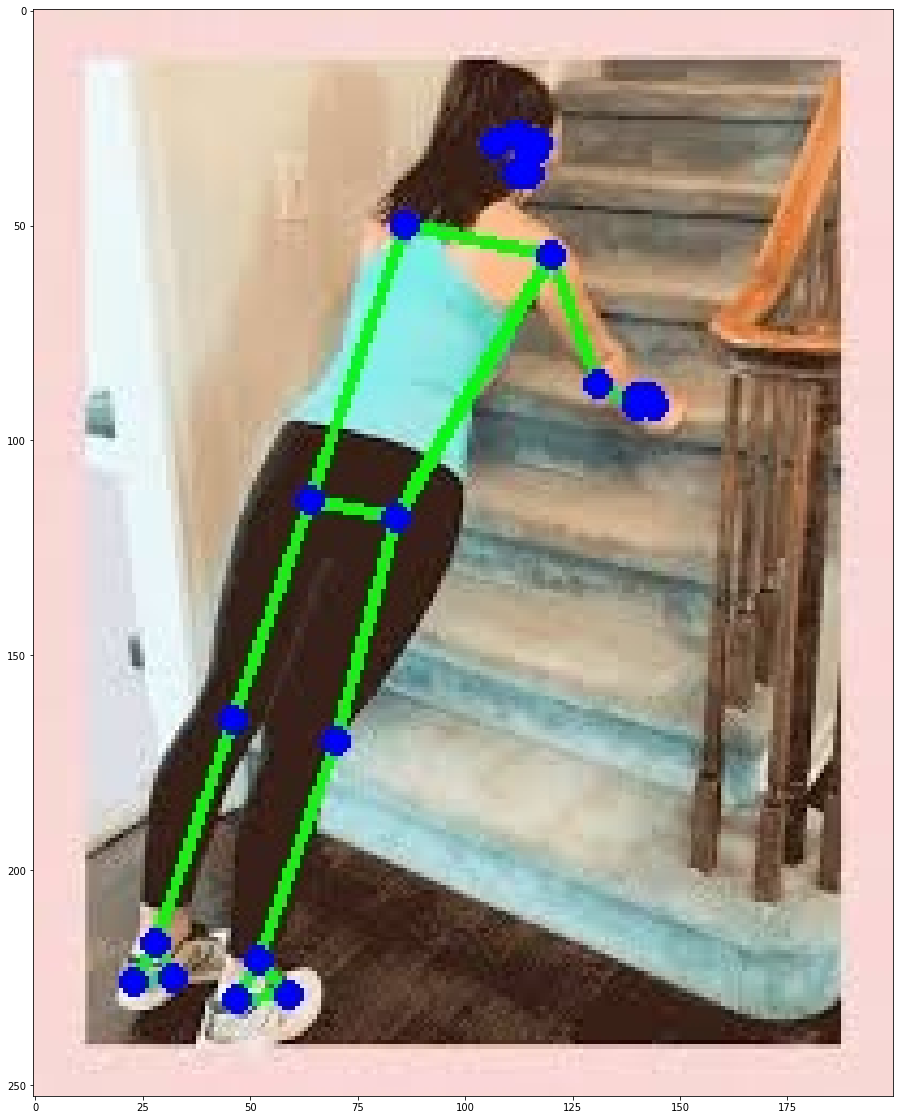

Outlier
  sample path =     fitness_poses_images_out/pushups_up/u65.jpg
  sample class =    pushups_up
  detected class =  ['pushups_down']
  all classes =     {'pushups_down': 7, 'pushups_up': 3}


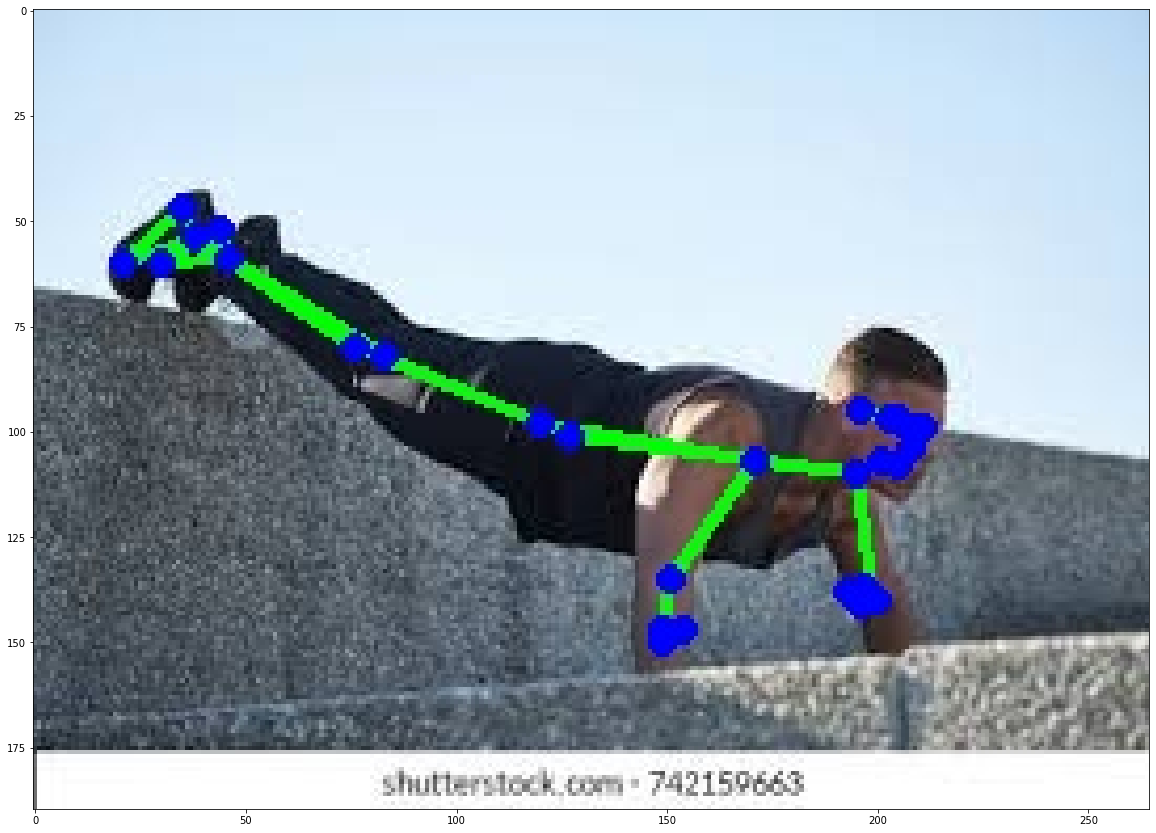

Outlier
  sample path =     fitness_poses_images_out/pushups_up/u8.jpg
  sample class =    pushups_up
  detected class =  ['pushups_down', 'pushups_up']
  all classes =     {'pushups_down': 5, 'pushups_up': 5}


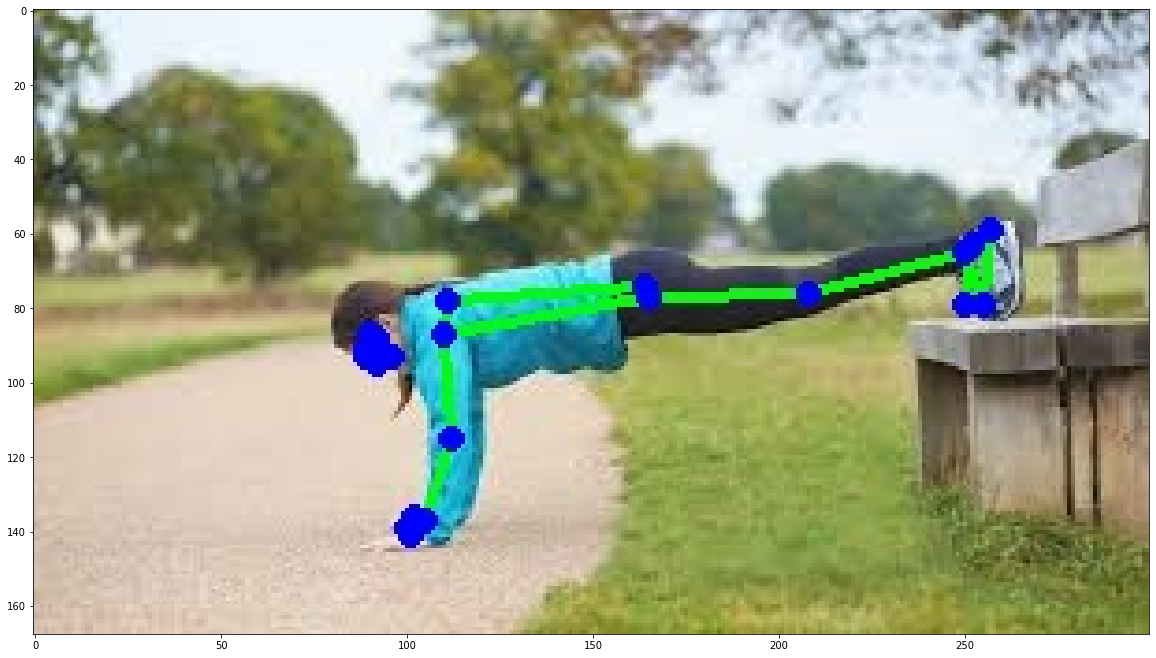

In [46]:
# Analyze outliers.
bootstrap_helper.analyze_outliers(outliers)

In [47]:
# Remove all outliers (if you don't want to manually pick).
bootstrap_helper.remove_outliers(outliers)

In [48]:
# Align CSVs with images after removing outliers.
bootstrap_helper.align_images_and_csvs(print_removed_items=False)
bootstrap_helper.print_images_out_statistics()

Number of images per pose class:
  pushups_down: 75
  pushups_up: 75


# Step 2: Classification of a pose



In [49]:
# Upload your test video.
uploaded = files.upload()
os.listdir('.')

Saving production ID_4964649.mp4 to production ID_4964649.mp4


['.config',
 'fitness_poses_csvs_out55',
 'sqauts.mp4',
 'fitness_poses_images_in_sq77',
 'fitness_poses_images_out999',
 'fitness_poses_csvs_out',
 'production ID_4964649.mp4',
 'fitness_poses_images_in',
 'fitness_poses_images_out44',
 'fitness_poses_images_in_sq000',
 'fitness_poses_images_in.zip',
 'fitness_poses_csvs_out99',
 'fitness_poses_images_out',
 'squats-sample-out.mov',
 'fitness_poses_images_in_sq66.zip',
 'fitness_poses_images_in_sq0000.zip',
 '.ipynb_checkpoints',
 'sample_data']

In [56]:
# Specify your video name and target pose class to count the repetitions.
video_path = 'production ID_4964649.mp4'
class_name='pushups_up'
out_video_path = 'pushups-sample-out.mov'

In [57]:
# Open the video.
import cv2

video_cap = cv2.VideoCapture(video_path)

# Get some video parameters to generate output video with classificaiton.
video_n_frames = video_cap.get(cv2.CAP_PROP_FRAME_COUNT)
video_fps = video_cap.get(cv2.CAP_PROP_FPS)
video_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
video_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [58]:
# Initilize tracker, classifier and counter.
# Do that before every video as all of them have state.
from mediapipe.python.solutions import pose as mp_pose


# Folder with pose class CSVs. That should be the same folder you using while
# building classifier to output CSVs.
pose_samples_folder = 'fitness_poses_csvs_out'

# Initialize tracker.
pose_tracker = mp_pose.Pose(upper_body_only=False)

# Initialize embedder.
pose_embedder = FullBodyPoseEmbedder()

# Initialize classifier.
# Ceck that you are using the same parameters as during bootstrapping.
pose_classifier = PoseClassifier(
    pose_samples_folder=pose_samples_folder,
    pose_embedder=pose_embedder,
    top_n_by_max_distance=30,
    top_n_by_mean_distance=10)

# # Uncomment to validate target poses used by classifier and find outliers.
# outliers = pose_classifier.find_pose_sample_outliers()
# print('Number of pose sample outliers (consider removing them): ', len(outliers))

# Initialize EMA smoothing.
pose_classification_filter = EMADictSmoothing(
    window_size=10,
    alpha=0.2)

# Initialize counter.
repetition_counter = RepetitionCounter(
    class_name=class_name,
    enter_threshold=6,
    exit_threshold=4)

# Initialize renderer.
pose_classification_visualizer = PoseClassificationVisualizer(
    class_name=class_name,
    plot_x_max=video_n_frames,
    # Graphic looks nicer if it's the same as `top_n_by_mean_distance`.
    plot_y_max=10)

  0%|          | 0/391.0 [00:00<?, ?it/s]No handles with labels found to put in legend.


*********************************
6.0
6.0
*********************************


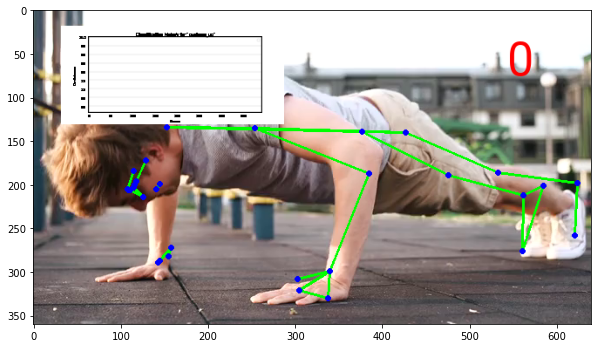

  0%|          | 1/391.0 [00:00<05:39,  1.15it/s]No handles with labels found to put in legend.
  1%|          | 2/391.0 [00:01<03:00,  2.16it/s]No handles with labels found to put in legend.


*********************************
5.444444444444445
5.444444444444445
*********************************
*********************************
5.2622950819672125
5.2622950819672125
*********************************


  1%|          | 3/391.0 [00:01<02:06,  3.07it/s]No handles with labels found to put in legend.
  1%|          | 4/391.0 [00:01<01:43,  3.74it/s]No handles with labels found to put in legend.


*********************************
5.173441734417344
5.173441734417344
*********************************
*********************************
5.121846739647786
5.121846739647786
*********************************


  1%|▏         | 5/391.0 [00:01<01:26,  4.44it/s]No handles with labels found to put in legend.
  2%|▏         | 6/391.0 [00:01<01:17,  4.98it/s]

*********************************
4.817763899731112
4.817763899731112
*********************************
*********************************
4.357736350237281
4.357736350237281
*********************************


No handles with labels found to put in legend.
  2%|▏         | 7/391.0 [00:02<01:39,  3.86it/s]No handles with labels found to put in legend.
  2%|▏         | 8/391.0 [00:02<01:26,  4.44it/s]No handles with labels found to put in legend.


*********************************
4.031446773037538
4.031446773037538
*********************************
*********************************
3.5621724904064562
3.5621724904064562
*********************************


  2%|▏         | 9/391.0 [00:02<01:19,  4.82it/s]No handles with labels found to put in legend.
  3%|▎         | 10/391.0 [00:02<01:13,  5.18it/s]No handles with labels found to put in legend.


*********************************
3.2121551685667935
3.2121551685667935
*********************************
*********************************
2.6494338852517636
2.6494338852517636
*********************************


  3%|▎         | 11/391.0 [00:02<01:08,  5.51it/s]No handles with labels found to put in legend.
  3%|▎         | 12/391.0 [00:02<01:07,  5.65it/s]No handles with labels found to put in legend.


*********************************
1.9992568585997397
1.9992568585997397
*********************************
*********************************
1.4791152372781202
1.4791152372781202
*********************************


  3%|▎         | 13/391.0 [00:03<01:05,  5.75it/s]No handles with labels found to put in legend.
  4%|▎         | 14/391.0 [00:03<01:02,  6.04it/s]No handles with labels found to put in legend.


*********************************
1.063001940220825
1.063001940220825
*********************************
*********************************
0.7301113025749885
0.7301113025749885
*********************************


  4%|▍         | 15/391.0 [00:03<01:02,  6.06it/s]No handles with labels found to put in legend.
  4%|▍         | 16/391.0 [00:03<01:00,  6.22it/s]No handles with labels found to put in legend.


*********************************
0.4878568423786536
0.4878568423786536
*********************************
*********************************
0.31811132414192006
0.31811132414192006
*********************************


  4%|▍         | 17/391.0 [00:03<00:59,  6.29it/s]No handles with labels found to put in legend.
  5%|▍         | 18/391.0 [00:03<00:56,  6.54it/s]

*********************************
0.18231490955253327
0.18231490955253327
*********************************
*********************************
0.09773582780135803
0.09773582780135803
*********************************


No handles with labels found to put in legend.
  5%|▍         | 19/391.0 [00:04<01:07,  5.54it/s]No handles with labels found to put in legend.
  5%|▌         | 20/391.0 [00:04<01:02,  5.91it/s]No handles with labels found to put in legend.


*********************************
0.030072562400417852
0.030072562400417852
*********************************


  5%|▌         | 21/391.0 [00:04<01:00,  6.12it/s]No handles with labels found to put in legend.
  6%|▌         | 22/391.0 [00:04<01:01,  5.97it/s]No handles with labels found to put in legend.
  6%|▌         | 23/391.0 [00:04<00:59,  6.18it/s]No handles with labels found to put in legend.
  6%|▌         | 24/391.0 [00:04<00:57,  6.34it/s]No handles with labels found to put in legend.
  6%|▋         | 25/391.0 [00:04<00:57,  6.42it/s]No handles with labels found to put in legend.
  7%|▋         | 26/391.0 [00:05<00:56,  6.47it/s]No handles with labels found to put in legend.
  7%|▋         | 27/391.0 [00:05<00:55,  6.57it/s]No handles with labels found to put in legend.
  7%|▋         | 28/391.0 [00:05<00:56,  6.39it/s]No handles with labels found to put in legend.
  7%|▋         | 29/391.0 [00:05<00:55,  6.56it/s]No handles with labels found to put in legend.
  8%|▊         | 30/391.0 [00:05<00:54,  6.67it/s]No handles with labels found to put in legend.
  8%|▊         | 31/391.0 [00:

*********************************
0.4481160998406684
0.4481160998406684
*********************************
*********************************
0.8066089797132031
0.8066089797132031
*********************************


 10%|▉         | 38/391.0 [00:07<00:57,  6.16it/s]No handles with labels found to put in legend.
 10%|▉         | 39/391.0 [00:07<00:55,  6.30it/s]No handles with labels found to put in legend.


*********************************
1.093403283611231
1.093403283611231
*********************************
*********************************
1.5468967766499873
1.5468967766499873
*********************************


 10%|█         | 40/391.0 [00:07<00:56,  6.22it/s]No handles with labels found to put in legend.
 10%|█         | 41/391.0 [00:07<00:54,  6.38it/s]No handles with labels found to put in legend.


*********************************
2.133749621001327
2.133749621001327
*********************************
*********************************
2.8272899464027326
2.8272899464027326
*********************************


 11%|█         | 42/391.0 [00:07<00:54,  6.40it/s]No handles with labels found to put in legend.
 11%|█         | 43/391.0 [00:07<00:53,  6.56it/s]No handles with labels found to put in legend.


*********************************
3.382122206723857
3.382122206723857
*********************************
*********************************
3.825988014980757
3.825988014980757
*********************************


 11%|█▏        | 44/391.0 [00:07<00:55,  6.29it/s]No handles with labels found to put in legend.
 12%|█▏        | 45/391.0 [00:08<00:53,  6.47it/s]No handles with labels found to put in legend.


*********************************
4.629196761426945
4.629196761426945
*********************************
*********************************
5.271763758583896
5.271763758583896
*********************************


 12%|█▏        | 46/391.0 [00:08<00:54,  6.36it/s]No handles with labels found to put in legend.
 12%|█▏        | 47/391.0 [00:08<00:53,  6.48it/s]No handles with labels found to put in legend.


*********************************
5.961759306389122
5.961759306389122
*********************************
*********************************
6.513755744633302
6.513755744633302
*********************************


 12%|█▏        | 48/391.0 [00:08<00:53,  6.40it/s]No handles with labels found to put in legend.
 13%|█▎        | 49/391.0 [00:08<00:52,  6.55it/s]No handles with labels found to put in legend.


*********************************
7.403468995069316
7.403468995069316
*********************************
*********************************
8.091181545497793
8.091181545497793
*********************************


 13%|█▎        | 50/391.0 [00:08<00:52,  6.44it/s]No handles with labels found to put in legend.


*********************************
8.61729353592024
8.61729353592024
*********************************


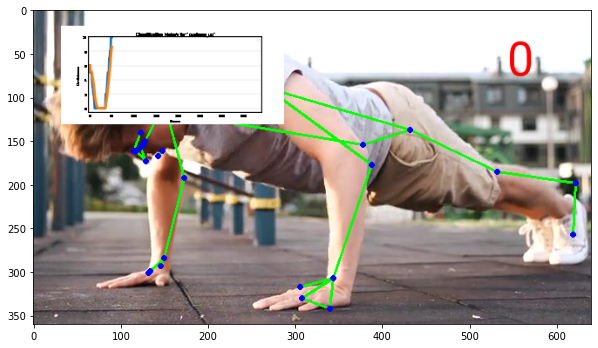

 13%|█▎        | 51/391.0 [00:09<01:20,  4.22it/s]

*********************************
9.014125078337862
9.014125078337862
*********************************


No handles with labels found to put in legend.
 13%|█▎        | 52/391.0 [00:09<01:39,  3.42it/s]No handles with labels found to put in legend.
 14%|█▎        | 53/391.0 [00:09<01:24,  4.02it/s]No handles with labels found to put in legend.


*********************************
9.331590312271961
9.331590312271961
*********************************
*********************************
9.585562499419241
9.585562499419241
*********************************


 14%|█▍        | 54/391.0 [00:10<01:15,  4.44it/s]No handles with labels found to put in legend.
 14%|█▍        | 55/391.0 [00:10<01:08,  4.92it/s]No handles with labels found to put in legend.


*********************************
9.740624149296394
9.740624149296394
*********************************
*********************************
9.86467346919812
9.86467346919812
*********************************


 14%|█▍        | 56/391.0 [00:10<01:05,  5.13it/s]No handles with labels found to put in legend.
 15%|█▍        | 57/391.0 [00:10<01:01,  5.39it/s]No handles with labels found to put in legend.


*********************************
9.939854875199163
9.939854875199163
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 15%|█▍        | 58/391.0 [00:10<00:59,  5.55it/s]No handles with labels found to put in legend.
 15%|█▌        | 59/391.0 [00:10<00:57,  5.79it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 15%|█▌        | 60/391.0 [00:11<00:56,  5.85it/s]No handles with labels found to put in legend.
 16%|█▌        | 61/391.0 [00:11<00:54,  6.03it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 16%|█▌        | 62/391.0 [00:11<00:54,  6.09it/s]No handles with labels found to put in legend.
 16%|█▌        | 63/391.0 [00:11<00:58,  5.57it/s]

*********************************
9.999999999999998
9.999999999999998
*********************************


No handles with labels found to put in legend.
 16%|█▋        | 64/391.0 [00:11<00:57,  5.70it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 17%|█▋        | 65/391.0 [00:11<00:55,  5.88it/s]No handles with labels found to put in legend.
 17%|█▋        | 66/391.0 [00:12<00:54,  5.98it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 17%|█▋        | 67/391.0 [00:12<00:54,  5.96it/s]No handles with labels found to put in legend.
 17%|█▋        | 68/391.0 [00:12<00:52,  6.17it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 18%|█▊        | 69/391.0 [00:12<00:52,  6.17it/s]No handles with labels found to put in legend.
 18%|█▊        | 70/391.0 [00:12<00:50,  6.31it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 18%|█▊        | 71/391.0 [00:12<00:50,  6.28it/s]No handles with labels found to put in legend.
 18%|█▊        | 72/391.0 [00:12<00:50,  6.32it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 19%|█▊        | 73/391.0 [00:13<00:51,  6.23it/s]No handles with labels found to put in legend.
 19%|█▉        | 74/391.0 [00:13<00:50,  6.26it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 19%|█▉        | 75/391.0 [00:13<00:51,  6.11it/s]No handles with labels found to put in legend.
 19%|█▉        | 76/391.0 [00:13<00:50,  6.18it/s]

*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


No handles with labels found to put in legend.
 20%|█▉        | 77/391.0 [00:13<00:59,  5.30it/s]No handles with labels found to put in legend.
 20%|█▉        | 78/391.0 [00:14<00:56,  5.51it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 20%|██        | 79/391.0 [00:14<00:54,  5.73it/s]No handles with labels found to put in legend.
 20%|██        | 80/391.0 [00:14<00:53,  5.85it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 21%|██        | 81/391.0 [00:14<00:51,  6.01it/s]No handles with labels found to put in legend.
 21%|██        | 82/391.0 [00:14<00:51,  6.06it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 21%|██        | 83/391.0 [00:14<00:49,  6.19it/s]No handles with labels found to put in legend.
 21%|██▏       | 84/391.0 [00:15<00:50,  6.03it/s]

*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


No handles with labels found to put in legend.
 22%|██▏       | 85/391.0 [00:15<00:51,  5.95it/s]No handles with labels found to put in legend.
 22%|██▏       | 86/391.0 [00:15<00:51,  5.93it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 22%|██▏       | 87/391.0 [00:15<00:50,  6.05it/s]No handles with labels found to put in legend.
 23%|██▎       | 88/391.0 [00:15<00:49,  6.18it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 23%|██▎       | 89/391.0 [00:15<00:48,  6.24it/s]No handles with labels found to put in legend.
 23%|██▎       | 90/391.0 [00:16<00:49,  6.14it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 23%|██▎       | 91/391.0 [00:16<00:49,  6.09it/s]No handles with labels found to put in legend.
 24%|██▎       | 92/391.0 [00:16<00:47,  6.26it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 24%|██▍       | 93/391.0 [00:16<00:47,  6.25it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************


 24%|██▍       | 94/391.0 [00:16<00:57,  5.19it/s]No handles with labels found to put in legend.
 24%|██▍       | 95/391.0 [00:16<00:52,  5.59it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 25%|██▍       | 96/391.0 [00:17<00:52,  5.66it/s]No handles with labels found to put in legend.
 25%|██▍       | 97/391.0 [00:17<00:50,  5.87it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 25%|██▌       | 98/391.0 [00:17<00:50,  5.82it/s]No handles with labels found to put in legend.
 25%|██▌       | 99/391.0 [00:17<00:48,  5.97it/s]No handles with labels found to put in legend.


*********************************
9.775941950079664
9.775941950079664
*********************************
*********************************
9.372637460223062
9.372637460223062
*********************************


 26%|██▌       | 100/391.0 [00:17<00:48,  6.05it/s]No handles with labels found to put in legend.


*********************************
9.049993868337781
9.049993868337781
*********************************


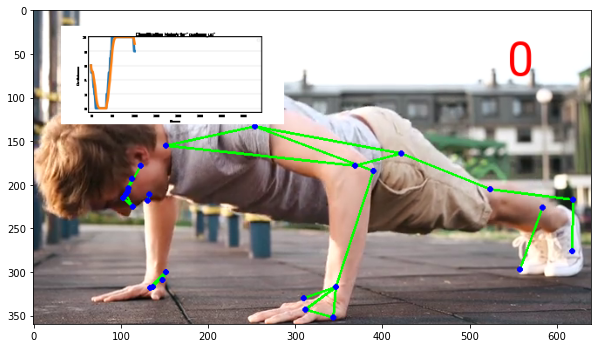

 26%|██▌       | 101/391.0 [00:18<01:10,  4.09it/s]No handles with labels found to put in legend.
 26%|██▌       | 102/391.0 [00:18<01:06,  4.34it/s]

*********************************
8.343762894988888
8.343762894988888
*********************************
*********************************
7.778778116309773
7.778778116309773
*********************************


No handles with labels found to put in legend.
 26%|██▋       | 103/391.0 [00:18<01:01,  4.66it/s]No handles with labels found to put in legend.
 27%|██▋       | 104/391.0 [00:18<00:56,  5.05it/s]No handles with labels found to put in legend.


*********************************
7.326790293366481
7.326790293366481
*********************************
*********************************
6.741141985091514
6.741141985091514
*********************************


 27%|██▋       | 105/391.0 [00:18<00:54,  5.28it/s]No handles with labels found to put in legend.
 27%|██▋       | 106/391.0 [00:19<00:50,  5.64it/s]No handles with labels found to put in legend.


*********************************
6.048565288551205
6.048565288551205
*********************************
*********************************
5.494503931318959
5.494503931318959
*********************************


 27%|██▋       | 107/391.0 [00:19<00:50,  5.65it/s]No handles with labels found to put in legend.
 28%|██▊       | 108/391.0 [00:19<00:49,  5.74it/s]No handles with labels found to put in legend.


*********************************
4.827196795612828
4.827196795612828
*********************************
*********************************
3.869293037127587
3.869293037127587
*********************************


 28%|██▊       | 109/391.0 [00:19<00:49,  5.75it/s]No handles with labels found to put in legend.
 28%|██▊       | 110/391.0 [00:19<00:47,  5.88it/s]No handles with labels found to put in legend.


*********************************
3.12702808025973
3.12702808025973
*********************************
*********************************
2.30915806484511
2.30915806484511
*********************************


 28%|██▊       | 111/391.0 [00:19<00:46,  5.97it/s]No handles with labels found to put in legend.
 29%|██▊       | 112/391.0 [00:20<00:45,  6.15it/s]No handles with labels found to put in legend.


*********************************
1.7029781523540823
1.7029781523540823
*********************************
*********************************
1.2180342223612601
1.2180342223612601
*********************************


 29%|██▉       | 113/391.0 [00:20<00:45,  6.07it/s]

*********************************
0.8300790783670025
0.8300790783670025
*********************************


No handles with labels found to put in legend.
 29%|██▉       | 114/391.0 [00:20<01:06,  4.16it/s]No handles with labels found to put in legend.
 29%|██▉       | 115/391.0 [00:20<00:59,  4.63it/s]No handles with labels found to put in legend.


*********************************
0.5437730130919307
0.5437730130919307
*********************************
*********************************
0.3387862107922074
0.3387862107922074
*********************************


 30%|██▉       | 116/391.0 [00:20<00:54,  5.03it/s]No handles with labels found to put in legend.
 30%|██▉       | 117/391.0 [00:21<00:50,  5.44it/s]No handles with labels found to put in legend.


*********************************
0.17479676895242877
0.17479676895242877
*********************************
*********************************
0.06766326540094017
0.06766326540094017
*********************************


 30%|███       | 118/391.0 [00:21<00:49,  5.48it/s]No handles with labels found to put in legend.
 30%|███       | 119/391.0 [00:21<00:47,  5.73it/s]No handles with labels found to put in legend.


*********************************
0.030072562400417852
0.030072562400417852
*********************************


 31%|███       | 120/391.0 [00:21<00:46,  5.83it/s]No handles with labels found to put in legend.
 31%|███       | 121/391.0 [00:21<00:44,  6.01it/s]No handles with labels found to put in legend.
 31%|███       | 122/391.0 [00:21<00:44,  6.04it/s]No handles with labels found to put in legend.
 31%|███▏      | 123/391.0 [00:22<00:43,  6.15it/s]No handles with labels found to put in legend.
 32%|███▏      | 124/391.0 [00:22<00:42,  6.22it/s]No handles with labels found to put in legend.
 32%|███▏      | 125/391.0 [00:22<00:41,  6.35it/s]No handles with labels found to put in legend.
 32%|███▏      | 126/391.0 [00:22<00:42,  6.25it/s]No handles with labels found to put in legend.
 32%|███▏      | 127/391.0 [00:22<00:42,  6.24it/s]No handles with labels found to put in legend.
 33%|███▎      | 128/391.0 [00:22<00:48,  5.45it/s]No handles with labels found to put in legend.
 33%|███▎      | 129/391.0 [00:23<00:46,  5.66it/s]No handles with labels found to put in legend.
 33%|███▎      | 130

*********************************
0.2240580499203342
0.2240580499203342
*********************************
*********************************
0.6273625397769358
0.6273625397769358
*********************************


 36%|███▌      | 139/391.0 [00:24<00:40,  6.30it/s]No handles with labels found to put in legend.
 36%|███▌      | 140/391.0 [00:24<00:39,  6.41it/s]No handles with labels found to put in legend.


*********************************
0.7259480817418829
0.7259480817418829
*********************************
*********************************
1.252932615154509
1.252932615154509
*********************************


 36%|███▌      | 141/391.0 [00:24<00:39,  6.34it/s]No handles with labels found to put in legend.
 36%|███▋      | 142/391.0 [00:25<00:39,  6.34it/s]No handles with labels found to put in legend.


*********************************
1.898578291804944
1.898578291804944
*********************************
*********************************
2.6391528830456266
2.6391528830456266
*********************************


 37%|███▋      | 143/391.0 [00:25<00:40,  6.11it/s]No handles with labels found to put in legend.
 37%|███▋      | 144/391.0 [00:25<00:39,  6.24it/s]

*********************************
3.2316125560381717
3.2316125560381717
*********************************
*********************************
3.929638344352543
3.929638344352543
*********************************


No handles with labels found to put in legend.
 37%|███▋      | 145/391.0 [00:25<00:48,  5.03it/s]No handles with labels found to put in legend.
 37%|███▋      | 146/391.0 [00:25<00:45,  5.42it/s]No handles with labels found to put in legend.


*********************************
4.488058975004039
4.488058975004039
*********************************
*********************************
5.158853529445572
5.158853529445572
*********************************


 38%|███▊      | 147/391.0 [00:26<00:43,  5.55it/s]No handles with labels found to put in legend.
 38%|███▊      | 148/391.0 [00:26<00:41,  5.80it/s]No handles with labels found to put in legend.


*********************************
5.671431123078462
5.671431123078462
*********************************
*********************************
6.05743514806444
6.05743514806444
*********************************


 38%|███▊      | 149/391.0 [00:26<00:40,  5.93it/s]No handles with labels found to put in legend.
 38%|███▊      | 150/391.0 [00:26<00:41,  5.87it/s]

*********************************
6.838412517814227
6.838412517814227
*********************************
*********************************
7.63913636369372
7.63913636369372
*********************************


No handles with labels found to put in legend.


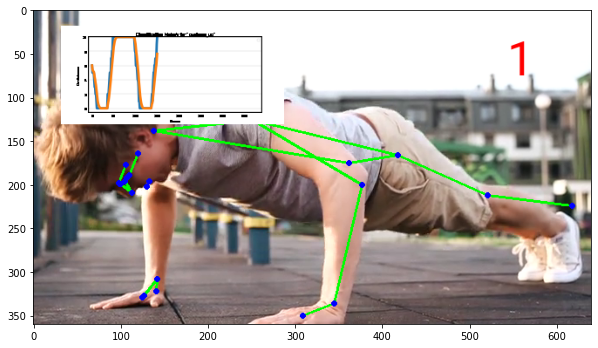

 39%|███▊      | 151/391.0 [00:26<01:00,  3.94it/s]No handles with labels found to put in legend.
 39%|███▉      | 152/391.0 [00:27<00:56,  4.21it/s]

*********************************
8.255657390476983
8.255657390476983
*********************************
*********************************
8.724816161983258
8.724816161983258
*********************************


No handles with labels found to put in legend.
 39%|███▉      | 153/391.0 [00:27<00:51,  4.61it/s]No handles with labels found to put in legend.
 39%|███▉      | 154/391.0 [00:27<00:47,  5.00it/s]No handles with labels found to put in legend.


*********************************
9.100143179188276
9.100143179188276
*********************************
*********************************
9.37634674303196
9.37634674303196
*********************************


 40%|███▉      | 155/391.0 [00:27<00:45,  5.23it/s]No handles with labels found to put in legend.
 40%|███▉      | 156/391.0 [00:27<00:42,  5.57it/s]No handles with labels found to put in legend.


*********************************
9.597309594106905
9.597309594106905
*********************************
*********************************
9.750021825046527
9.750021825046527
*********************************


 40%|████      | 157/391.0 [00:28<00:41,  5.61it/s]No handles with labels found to put in legend.
 40%|████      | 158/391.0 [00:28<00:40,  5.78it/s]No handles with labels found to put in legend.


*********************************
9.872191609798223
9.872191609798223
*********************************
*********************************
9.96992743759958
9.96992743759958
*********************************


 41%|████      | 159/391.0 [00:28<00:40,  5.77it/s]No handles with labels found to put in legend.
 41%|████      | 160/391.0 [00:28<00:39,  5.86it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 41%|████      | 161/391.0 [00:28<00:39,  5.85it/s]No handles with labels found to put in legend.
 41%|████▏     | 162/391.0 [00:28<00:38,  6.02it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 42%|████▏     | 163/391.0 [00:29<00:38,  5.94it/s]No handles with labels found to put in legend.
 42%|████▏     | 164/391.0 [00:29<00:37,  6.04it/s]

*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


No handles with labels found to put in legend.
 42%|████▏     | 165/391.0 [00:29<00:54,  4.18it/s]No handles with labels found to put in legend.
 42%|████▏     | 166/391.0 [00:29<00:49,  4.55it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 43%|████▎     | 167/391.0 [00:29<00:46,  4.83it/s]No handles with labels found to put in legend.
 43%|████▎     | 168/391.0 [00:30<00:43,  5.17it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 43%|████▎     | 169/391.0 [00:30<00:41,  5.30it/s]No handles with labels found to put in legend.
 43%|████▎     | 170/391.0 [00:30<00:40,  5.50it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 44%|████▎     | 171/391.0 [00:30<00:40,  5.49it/s]No handles with labels found to put in legend.
 44%|████▍     | 172/391.0 [00:30<00:38,  5.68it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 44%|████▍     | 173/391.0 [00:30<00:38,  5.67it/s]No handles with labels found to put in legend.
 45%|████▍     | 174/391.0 [00:31<00:37,  5.85it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 45%|████▍     | 175/391.0 [00:31<00:38,  5.67it/s]No handles with labels found to put in legend.
 45%|████▌     | 176/391.0 [00:31<00:36,  5.92it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 45%|████▌     | 177/391.0 [00:31<00:36,  5.88it/s]No handles with labels found to put in legend.
 46%|████▌     | 178/391.0 [00:31<00:35,  5.96it/s]

*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


No handles with labels found to put in legend.
 46%|████▌     | 179/391.0 [00:32<00:42,  5.03it/s]No handles with labels found to put in legend.
 46%|████▌     | 180/391.0 [00:32<00:39,  5.31it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 46%|████▋     | 181/391.0 [00:32<00:38,  5.43it/s]No handles with labels found to put in legend.
 47%|████▋     | 182/391.0 [00:32<00:37,  5.64it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 47%|████▋     | 183/391.0 [00:32<00:36,  5.69it/s]No handles with labels found to put in legend.
 47%|████▋     | 184/391.0 [00:32<00:35,  5.89it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 47%|████▋     | 185/391.0 [00:33<00:34,  5.94it/s]No handles with labels found to put in legend.
 48%|████▊     | 186/391.0 [00:33<00:34,  6.01it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 48%|████▊     | 187/391.0 [00:33<00:34,  5.92it/s]No handles with labels found to put in legend.
 48%|████▊     | 188/391.0 [00:33<00:34,  5.94it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 48%|████▊     | 189/391.0 [00:33<00:33,  6.00it/s]No handles with labels found to put in legend.
 49%|████▊     | 190/391.0 [00:33<00:33,  6.08it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 49%|████▉     | 191/391.0 [00:34<00:32,  6.09it/s]No handles with labels found to put in legend.
 49%|████▉     | 192/391.0 [00:34<00:33,  5.99it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 49%|████▉     | 193/391.0 [00:34<00:34,  5.80it/s]No handles with labels found to put in legend.
 50%|████▉     | 194/391.0 [00:34<00:33,  5.86it/s]

*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


No handles with labels found to put in legend.
 50%|████▉     | 195/391.0 [00:34<00:34,  5.66it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************


 50%|█████     | 196/391.0 [00:35<00:42,  4.64it/s]No handles with labels found to put in legend.
 50%|█████     | 197/391.0 [00:35<00:38,  5.02it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 51%|█████     | 198/391.0 [00:35<00:37,  5.12it/s]No handles with labels found to put in legend.
 51%|█████     | 199/391.0 [00:35<00:35,  5.37it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 51%|█████     | 200/391.0 [00:35<00:34,  5.52it/s]No handles with labels found to put in legend.


*********************************
9.775941950079664
9.775941950079664
*********************************


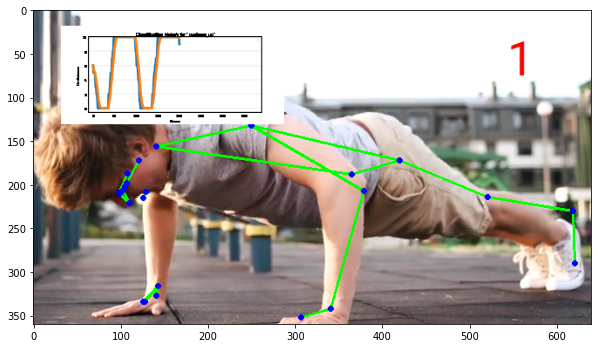

 51%|█████▏    | 201/391.0 [00:36<00:49,  3.83it/s]No handles with labels found to put in legend.
 52%|█████▏    | 202/391.0 [00:36<00:46,  4.07it/s]

*********************************
9.372637460223062
9.372637460223062
*********************************
*********************************
9.049993868337781
9.049993868337781
*********************************


No handles with labels found to put in legend.
 52%|█████▏    | 203/391.0 [00:36<00:42,  4.37it/s]No handles with labels found to put in legend.
 52%|█████▏    | 204/391.0 [00:36<00:39,  4.70it/s]

*********************************
8.567820944909222
8.567820944909222
*********************************
*********************************
7.958024556246039
7.958024556246039
*********************************


No handles with labels found to put in legend.
 52%|█████▏    | 205/391.0 [00:36<00:37,  4.94it/s]No handles with labels found to put in legend.
 53%|█████▎    | 206/391.0 [00:37<00:35,  5.27it/s]No handles with labels found to put in legend.


*********************************
7.470187445315496
7.470187445315496
*********************************
*********************************
7.079917756571059
7.079917756571059
*********************************


 53%|█████▎    | 207/391.0 [00:37<00:33,  5.42it/s]No handles with labels found to put in legend.
 53%|█████▎    | 208/391.0 [00:37<00:32,  5.60it/s]No handles with labels found to put in legend.


*********************************
6.543643955655176
6.543643955655176
*********************************
*********************************
5.890566865002135
5.890566865002135
*********************************


 53%|█████▎    | 209/391.0 [00:37<00:32,  5.63it/s]No handles with labels found to put in legend.
 54%|█████▎    | 210/391.0 [00:37<00:31,  5.84it/s]No handles with labels found to put in legend.


*********************************
5.368105192479703
5.368105192479703
*********************************
*********************************
4.750135854461756
4.750135854461756
*********************************


 54%|█████▍    | 211/391.0 [00:37<00:30,  5.91it/s]No handles with labels found to put in legend.
 54%|█████▍    | 212/391.0 [00:38<00:29,  6.06it/s]No handles with labels found to put in legend.


*********************************
3.8317023341270646
3.8317023341270646
*********************************
*********************************
3.0969555178593122
3.0969555178593122
*********************************


 54%|█████▍    | 213/391.0 [00:38<00:30,  5.88it/s]No handles with labels found to put in legend.
 55%|█████▍    | 214/391.0 [00:38<00:29,  5.96it/s]No handles with labels found to put in legend.


*********************************
2.30915806484511
2.30915806484511
*********************************
*********************************
1.7029781523540823
1.7029781523540823
*********************************


 55%|█████▍    | 215/391.0 [00:38<00:29,  5.92it/s]

*********************************
1.2180342223612601
1.2180342223612601
*********************************


No handles with labels found to put in legend.
 55%|█████▌    | 216/391.0 [00:39<00:41,  4.19it/s]No handles with labels found to put in legend.
 55%|█████▌    | 217/391.0 [00:39<00:37,  4.65it/s]No handles with labels found to put in legend.


*********************************
0.8300790783670025
0.8300790783670025
*********************************
*********************************
0.5437730130919307
0.5437730130919307
*********************************


 56%|█████▌    | 218/391.0 [00:39<00:35,  4.92it/s]No handles with labels found to put in legend.
 56%|█████▌    | 219/391.0 [00:39<00:32,  5.23it/s]No handles with labels found to put in legend.


*********************************
0.3387862107922074
0.3387862107922074
*********************************
*********************************
0.17479676895242877
0.17479676895242877
*********************************


 56%|█████▋    | 220/391.0 [00:39<00:32,  5.25it/s]No handles with labels found to put in legend.
 57%|█████▋    | 221/391.0 [00:39<00:30,  5.52it/s]No handles with labels found to put in legend.


*********************************
0.06766326540094017
0.06766326540094017
*********************************
*********************************
0.030072562400417852
0.030072562400417852
*********************************


 57%|█████▋    | 222/391.0 [00:40<00:30,  5.53it/s]No handles with labels found to put in legend.
 57%|█████▋    | 223/391.0 [00:40<00:29,  5.64it/s]No handles with labels found to put in legend.
 57%|█████▋    | 224/391.0 [00:40<00:29,  5.70it/s]No handles with labels found to put in legend.
 58%|█████▊    | 225/391.0 [00:40<00:28,  5.82it/s]No handles with labels found to put in legend.
 58%|█████▊    | 226/391.0 [00:40<00:28,  5.79it/s]No handles with labels found to put in legend.
 58%|█████▊    | 227/391.0 [00:40<00:27,  5.89it/s]No handles with labels found to put in legend.
 58%|█████▊    | 228/391.0 [00:41<00:27,  6.01it/s]No handles with labels found to put in legend.
 59%|█████▊    | 229/391.0 [00:41<00:26,  6.03it/s]No handles with labels found to put in legend.
 59%|█████▉    | 230/391.0 [00:41<00:31,  5.10it/s]No handles with labels found to put in legend.
 59%|█████▉    | 231/391.0 [00:41<00:29,  5.44it/s]No handles with labels found to put in legend.
 59%|█████▉    | 232

*********************************
0.2240580499203342
0.2240580499203342
*********************************
*********************************
0.6273625397769358
0.6273625397769358
*********************************


 62%|██████▏   | 242/391.0 [00:43<00:25,  5.85it/s]No handles with labels found to put in legend.
 62%|██████▏   | 243/391.0 [00:43<00:25,  5.85it/s]No handles with labels found to put in legend.


*********************************
0.950006131662217
0.950006131662217
*********************************
*********************************
1.4321790550907763
1.4321790550907763
*********************************


 62%|██████▏   | 244/391.0 [00:43<00:25,  5.83it/s]No handles with labels found to put in legend.
 63%|██████▎   | 245/391.0 [00:43<00:24,  5.85it/s]No handles with labels found to put in legend.


*********************************
1.8179173938336237
1.8179173938336237
*********************************
*********************************
2.126508064827902
2.126508064827902
*********************************


 63%|██████▎   | 246/391.0 [00:44<00:24,  5.85it/s]No handles with labels found to put in legend.
 63%|██████▎   | 247/391.0 [00:44<00:24,  5.88it/s]

*********************************
2.5974386515436585
2.5974386515436585
*********************************
*********************************
3.198241170836597
3.198241170836597
*********************************


No handles with labels found to put in legend.
 63%|██████▎   | 248/391.0 [00:44<00:29,  4.81it/s]No handles with labels found to put in legend.
 64%|██████▎   | 249/391.0 [00:44<00:27,  5.18it/s]No handles with labels found to put in legend.


*********************************
3.678883186270949
3.678883186270949
*********************************
*********************************
4.06339679861843
4.06339679861843
*********************************


 64%|██████▍   | 250/391.0 [00:44<00:26,  5.36it/s]No handles with labels found to put in legend.


*********************************
4.79506573841675
4.79506573841675
*********************************


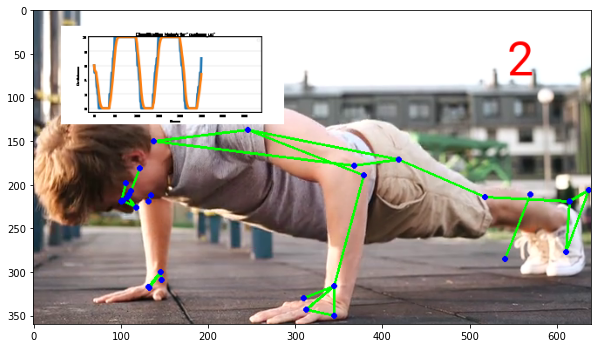

 64%|██████▍   | 251/391.0 [00:45<00:37,  3.72it/s]No handles with labels found to put in legend.
 64%|██████▍   | 252/391.0 [00:45<00:34,  4.04it/s]

*********************************
5.5804008902554045
5.5804008902554045
*********************************
*********************************
6.208669011726331
6.208669011726331
*********************************


No handles with labels found to put in legend.
 65%|██████▍   | 253/391.0 [00:45<00:32,  4.29it/s]No handles with labels found to put in legend.
 65%|██████▍   | 254/391.0 [00:45<00:28,  4.73it/s]No handles with labels found to put in legend.


*********************************
6.687225458982735
6.687225458982735
*********************************
*********************************
7.294128666708193
7.294128666708193
*********************************


 65%|██████▌   | 255/391.0 [00:46<00:27,  4.99it/s]No handles with labels found to put in legend.
 65%|██████▌   | 256/391.0 [00:46<00:25,  5.21it/s]

*********************************
8.003709282808895
8.003709282808895
*********************************
*********************************
8.54731572576912
8.54731572576912
*********************************


No handles with labels found to put in legend.
 66%|██████▌   | 257/391.0 [00:46<00:25,  5.20it/s]No handles with labels found to put in legend.
 66%|██████▌   | 258/391.0 [00:46<00:25,  5.24it/s]No handles with labels found to put in legend.


*********************************
8.958142830216968
8.958142830216968
*********************************
*********************************
9.286804513775245
9.286804513775245
*********************************


 66%|██████▌   | 259/391.0 [00:46<00:24,  5.37it/s]No handles with labels found to put in legend.
 66%|██████▋   | 260/391.0 [00:47<00:24,  5.45it/s]No handles with labels found to put in legend.


*********************************
9.549733860621867
9.549733860621867
*********************************
*********************************
9.711961238258498
9.711961238258498
*********************************


 67%|██████▋   | 261/391.0 [00:47<00:23,  5.52it/s]No handles with labels found to put in legend.
 67%|██████▋   | 262/391.0 [00:47<00:23,  5.59it/s]No handles with labels found to put in legend.


*********************************
9.817685090447467
9.817685090447467
*********************************
*********************************
9.902264172198642
9.902264172198642
*********************************


 67%|██████▋   | 263/391.0 [00:47<00:23,  5.56it/s]No handles with labels found to put in legend.
 68%|██████▊   | 264/391.0 [00:47<00:22,  5.64it/s]No handles with labels found to put in legend.


*********************************
9.96992743759958
9.96992743759958
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 68%|██████▊   | 265/391.0 [00:47<00:22,  5.58it/s]No handles with labels found to put in legend.
 68%|██████▊   | 266/391.0 [00:48<00:21,  5.68it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 68%|██████▊   | 267/391.0 [00:48<00:21,  5.64it/s]No handles with labels found to put in legend.
 69%|██████▊   | 268/391.0 [00:48<00:21,  5.73it/s]

*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


No handles with labels found to put in legend.
 69%|██████▉   | 269/391.0 [00:48<00:30,  4.00it/s]No handles with labels found to put in legend.
 69%|██████▉   | 270/391.0 [00:49<00:27,  4.42it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 69%|██████▉   | 271/391.0 [00:49<00:25,  4.71it/s]No handles with labels found to put in legend.
 70%|██████▉   | 272/391.0 [00:49<00:23,  5.04it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 70%|██████▉   | 273/391.0 [00:49<00:22,  5.15it/s]No handles with labels found to put in legend.
 70%|███████   | 274/391.0 [00:49<00:21,  5.35it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 70%|███████   | 275/391.0 [00:49<00:21,  5.35it/s]No handles with labels found to put in legend.
 71%|███████   | 276/391.0 [00:50<00:20,  5.58it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 71%|███████   | 277/391.0 [00:50<00:20,  5.52it/s]No handles with labels found to put in legend.
 71%|███████   | 278/391.0 [00:50<00:20,  5.49it/s]

*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


No handles with labels found to put in legend.
 71%|███████▏  | 279/391.0 [00:50<00:20,  5.41it/s]No handles with labels found to put in legend.
 72%|███████▏  | 280/391.0 [00:50<00:20,  5.51it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 72%|███████▏  | 281/391.0 [00:50<00:20,  5.50it/s]No handles with labels found to put in legend.
 72%|███████▏  | 282/391.0 [00:51<00:19,  5.52it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 72%|███████▏  | 283/391.0 [00:51<00:19,  5.52it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************


 73%|███████▎  | 284/391.0 [00:51<00:22,  4.83it/s]No handles with labels found to put in legend.
 73%|███████▎  | 285/391.0 [00:51<00:21,  5.01it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 73%|███████▎  | 286/391.0 [00:51<00:19,  5.26it/s]No handles with labels found to put in legend.
 73%|███████▎  | 287/391.0 [00:52<00:19,  5.46it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 74%|███████▎  | 288/391.0 [00:52<00:18,  5.53it/s]No handles with labels found to put in legend.
 74%|███████▍  | 289/391.0 [00:52<00:17,  5.71it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 74%|███████▍  | 290/391.0 [00:52<00:18,  5.61it/s]No handles with labels found to put in legend.
 74%|███████▍  | 291/391.0 [00:52<00:17,  5.79it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 75%|███████▍  | 292/391.0 [00:52<00:17,  5.70it/s]No handles with labels found to put in legend.
 75%|███████▍  | 293/391.0 [00:53<00:16,  5.78it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 75%|███████▌  | 294/391.0 [00:53<00:16,  5.72it/s]No handles with labels found to put in legend.
 75%|███████▌  | 295/391.0 [00:53<00:16,  5.76it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 76%|███████▌  | 296/391.0 [00:53<00:16,  5.68it/s]No handles with labels found to put in legend.
 76%|███████▌  | 297/391.0 [00:53<00:16,  5.83it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 76%|███████▌  | 298/391.0 [00:54<00:16,  5.73it/s]No handles with labels found to put in legend.
 76%|███████▋  | 299/391.0 [00:54<00:15,  5.86it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 77%|███████▋  | 300/391.0 [00:54<00:15,  5.79it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************


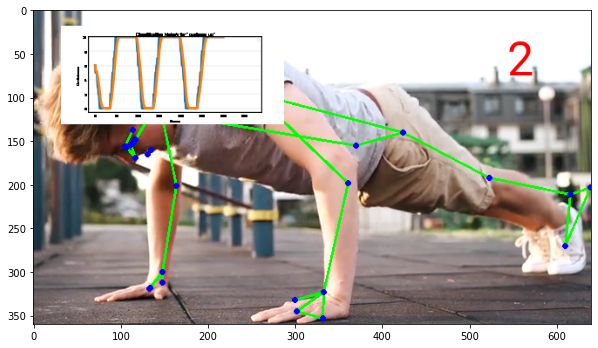

 77%|███████▋  | 301/391.0 [00:54<00:23,  3.88it/s]

*********************************
9.999999999999998
9.999999999999998
*********************************


No handles with labels found to put in legend.
 77%|███████▋  | 302/391.0 [00:55<00:28,  3.18it/s]No handles with labels found to put in legend.
 77%|███████▋  | 303/391.0 [00:55<00:24,  3.64it/s]

*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


No handles with labels found to put in legend.
 78%|███████▊  | 304/391.0 [00:55<00:21,  3.96it/s]No handles with labels found to put in legend.
 78%|███████▊  | 305/391.0 [00:55<00:19,  4.43it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 78%|███████▊  | 306/391.0 [00:55<00:17,  4.75it/s]No handles with labels found to put in legend.
 79%|███████▊  | 307/391.0 [00:56<00:16,  5.06it/s]No handles with labels found to put in legend.


*********************************
9.55188390015933
9.55188390015933
*********************************
*********************************
9.193391020286795
9.193391020286795
*********************************


 79%|███████▉  | 308/391.0 [00:56<00:16,  5.17it/s]No handles with labels found to put in legend.
 79%|███████▉  | 309/391.0 [00:56<00:15,  5.28it/s]No handles with labels found to put in legend.


*********************************
8.4584806165481
8.4584806165481
*********************************
*********************************
7.870552293557141
7.870552293557141
*********************************


 79%|███████▉  | 310/391.0 [00:56<00:15,  5.30it/s]No handles with labels found to put in legend.
 80%|███████▉  | 311/391.0 [00:56<00:14,  5.56it/s]No handles with labels found to put in legend.


*********************************
7.1761515852440425
7.1761515852440425
*********************************
*********************************
6.396572968673228
6.396572968673228
*********************************


 80%|███████▉  | 312/391.0 [00:57<00:14,  5.35it/s]No handles with labels found to put in legend.
 80%|████████  | 313/391.0 [00:57<00:15,  4.93it/s]

*********************************
5.772910075416577
5.772910075416577
*********************************


No handles with labels found to put in legend.
 80%|████████  | 314/391.0 [00:57<00:15,  4.93it/s]

*********************************
5.0499217108909225
5.0499217108909225
*********************************
*********************************
4.2474729693500635
4.2474729693500635
*********************************


No handles with labels found to put in legend.
 81%|████████  | 315/391.0 [00:57<00:15,  4.91it/s]No handles with labels found to put in legend.
 81%|████████  | 316/391.0 [00:57<00:14,  5.21it/s]No handles with labels found to put in legend.


*********************************
3.3814559261970425
3.3814559261970425
*********************************
*********************************
2.736758391515294
2.736758391515294
*********************************


 81%|████████  | 317/391.0 [00:58<00:14,  5.15it/s]No handles with labels found to put in legend.
 81%|████████▏ | 318/391.0 [00:58<00:13,  5.39it/s]No handles with labels found to put in legend.


*********************************
1.996942313849561
1.996942313849561
*********************************
*********************************
1.4532055515576432
1.4532055515576432
*********************************


 82%|████████▏ | 319/391.0 [00:58<00:13,  5.39it/s]No handles with labels found to put in legend.
 82%|████████▏ | 320/391.0 [00:58<00:12,  5.51it/s]

*********************************
1.018216141724109
1.018216141724109
*********************************
*********************************
0.6942826637776156
0.6942826637776156
*********************************


No handles with labels found to put in legend.
 82%|████████▏ | 321/391.0 [00:58<00:12,  5.41it/s]No handles with labels found to put in legend.
 82%|████████▏ | 322/391.0 [00:58<00:12,  5.58it/s]No handles with labels found to put in legend.


*********************************
0.4591939313407554
0.4591939313407554
*********************************
*********************************
0.2711229453912672
0.2711229453912672
*********************************


 83%|████████▎ | 323/391.0 [00:59<00:12,  5.60it/s]No handles with labels found to put in legend.
 83%|████████▎ | 324/391.0 [00:59<00:12,  5.55it/s]

*********************************
0.14472420655201093
0.14472420655201093
*********************************
*********************************
0.06766326540094017
0.06766326540094017
*********************************


No handles with labels found to put in legend.
 83%|████████▎ | 325/391.0 [00:59<00:12,  5.48it/s]No handles with labels found to put in legend.
 83%|████████▎ | 326/391.0 [00:59<00:11,  5.57it/s]

*********************************
0.030072562400417852
0.030072562400417852
*********************************


No handles with labels found to put in legend.
 84%|████████▎ | 327/391.0 [00:59<00:13,  4.76it/s]No handles with labels found to put in legend.
 84%|████████▍ | 328/391.0 [01:00<00:12,  5.07it/s]No handles with labels found to put in legend.
 84%|████████▍ | 329/391.0 [01:00<00:11,  5.34it/s]No handles with labels found to put in legend.
 84%|████████▍ | 330/391.0 [01:00<00:11,  5.49it/s]No handles with labels found to put in legend.
 85%|████████▍ | 331/391.0 [01:00<00:10,  5.60it/s]No handles with labels found to put in legend.
 85%|████████▍ | 332/391.0 [01:00<00:10,  5.68it/s]No handles with labels found to put in legend.
 85%|████████▌ | 333/391.0 [01:00<00:09,  5.84it/s]No handles with labels found to put in legend.
 85%|████████▌ | 334/391.0 [01:01<00:09,  5.97it/s]No handles with labels found to put in legend.
 86%|████████▌ | 335/391.0 [01:01<00:09,  5.88it/s]No handles with labels found to put in legend.
 86%|████████▌ | 336/391.0 [01:01<00:09,  5.89it/s]No handles with labe

*********************************
0.2240580499203342
0.2240580499203342
*********************************
*********************************
0.6273625397769358
0.6273625397769358
*********************************


No handles with labels found to put in legend.
 90%|████████▉ | 350/391.0 [01:03<00:07,  5.56it/s]No handles with labels found to put in legend.


*********************************
0.950006131662217
0.950006131662217
*********************************


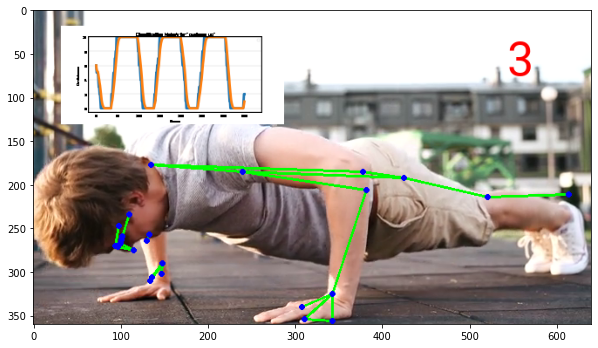

 90%|████████▉ | 351/391.0 [01:04<00:10,  3.82it/s]No handles with labels found to put in legend.
 90%|█████████ | 352/391.0 [01:04<00:09,  4.06it/s]

*********************************
1.4321790550907763
1.4321790550907763
*********************************
*********************************


No handles with labels found to put in legend.
 90%|█████████ | 353/391.0 [01:04<00:08,  4.27it/s]

1.8179173938336237
1.8179173938336237
*********************************
*********************************

No handles with labels found to put in legend.
 91%|█████████ | 354/391.0 [01:05<00:08,  4.56it/s]


2.3505661147482364
2.3505661147482364
*********************************
*********************************
2.776685091479926
2.776685091479926
*********************************


No handles with labels found to put in legend.
 91%|█████████ | 355/391.0 [01:05<00:07,  4.77it/s]No handles with labels found to put in legend.
 91%|█████████ | 356/391.0 [01:05<00:06,  5.02it/s]

*********************************
3.3416383227856112
3.3416383227856112
*********************************
*********************************
3.79360090783016
3.79360090783016
*********************************


No handles with labels found to put in legend.
 91%|█████████▏| 357/391.0 [01:05<00:06,  5.06it/s]No handles with labels found to put in legend.
 92%|█████████▏| 358/391.0 [01:05<00:06,  5.26it/s]

*********************************
4.379229025786134
4.379229025786134
*********************************
*********************************
5.047731520150913
5.047731520150913
*********************************


No handles with labels found to put in legend.
 92%|█████████▏| 359/391.0 [01:05<00:06,  5.18it/s]No handles with labels found to put in legend.
 92%|█████████▏| 360/391.0 [01:06<00:05,  5.37it/s]No handles with labels found to put in legend.


*********************************
5.558475465722401
5.558475465722401
*********************************
*********************************
6.191128672099926
6.191128672099926
*********************************


 92%|█████████▏| 361/391.0 [01:06<00:05,  5.28it/s]No handles with labels found to put in legend.
 93%|█████████▎| 362/391.0 [01:06<00:05,  5.40it/s]No handles with labels found to put in legend.


*********************************
6.897251237201946
6.897251237201946
*********************************
*********************************
7.686207339203895
7.686207339203895
*********************************


 93%|█████████▎| 363/391.0 [01:06<00:05,  5.37it/s]

*********************************
8.293314170885122
8.293314170885122
*********************************


No handles with labels found to put in legend.
 93%|█████████▎| 364/391.0 [01:07<00:06,  3.93it/s]No handles with labels found to put in legend.
 93%|█████████▎| 365/391.0 [01:07<00:05,  4.38it/s]No handles with labels found to put in legend.


*********************************
8.778999636230104
8.778999636230104
*********************************
*********************************
9.143489958585754
9.143489958585754
*********************************


 94%|█████████▎| 366/391.0 [01:07<00:05,  4.62it/s]No handles with labels found to put in legend.
 94%|█████████▍| 367/391.0 [01:07<00:04,  4.81it/s]

*********************************
9.435082216470276
9.435082216470276
*********************************
*********************************
9.644297972857556
9.644297972857556
*********************************


No handles with labels found to put in legend.
 94%|█████████▍| 368/391.0 [01:07<00:04,  4.99it/s]No handles with labels found to put in legend.
 94%|█████████▍| 369/391.0 [01:08<00:04,  5.24it/s]No handles with labels found to put in legend.


*********************************
9.787612528047049
9.787612528047049
*********************************
*********************************
9.902264172198642
9.902264172198642
*********************************


 95%|█████████▍| 370/391.0 [01:08<00:03,  5.31it/s]No handles with labels found to put in legend.
 95%|█████████▍| 371/391.0 [01:08<00:03,  5.42it/s]No handles with labels found to put in legend.


*********************************
9.96992743759958
9.96992743759958
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 95%|█████████▌| 372/391.0 [01:08<00:03,  5.42it/s]No handles with labels found to put in legend.
 95%|█████████▌| 373/391.0 [01:08<00:03,  5.56it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 96%|█████████▌| 374/391.0 [01:08<00:03,  5.36it/s]No handles with labels found to put in legend.
 96%|█████████▌| 375/391.0 [01:09<00:02,  5.50it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 96%|█████████▌| 376/391.0 [01:09<00:02,  5.46it/s]No handles with labels found to put in legend.
 96%|█████████▋| 377/391.0 [01:09<00:02,  5.61it/s]

*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


No handles with labels found to put in legend.
 97%|█████████▋| 378/391.0 [01:09<00:02,  4.79it/s]No handles with labels found to put in legend.
 97%|█████████▋| 379/391.0 [01:09<00:02,  5.00it/s]

*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


No handles with labels found to put in legend.
 97%|█████████▋| 380/391.0 [01:10<00:02,  5.12it/s]No handles with labels found to put in legend.
 97%|█████████▋| 381/391.0 [01:10<00:01,  5.23it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 98%|█████████▊| 382/391.0 [01:10<00:01,  5.34it/s]No handles with labels found to put in legend.
 98%|█████████▊| 383/391.0 [01:10<00:01,  5.47it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 98%|█████████▊| 384/391.0 [01:10<00:01,  5.37it/s]No handles with labels found to put in legend.
 98%|█████████▊| 385/391.0 [01:10<00:01,  5.54it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 99%|█████████▊| 386/391.0 [01:11<00:00,  5.45it/s]No handles with labels found to put in legend.
 99%|█████████▉| 387/391.0 [01:11<00:00,  5.63it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


 99%|█████████▉| 388/391.0 [01:11<00:00,  5.53it/s]No handles with labels found to put in legend.
 99%|█████████▉| 389/391.0 [01:11<00:00,  5.64it/s]No handles with labels found to put in legend.


*********************************
9.999999999999998
9.999999999999998
*********************************
*********************************
9.999999999999998
9.999999999999998
*********************************


100%|█████████▉| 390/391.0 [01:11<00:00,  5.56it/s]No handles with labels found to put in legend.
100%|██████████| 391/391.0 [01:12<00:00,  5.43it/s]


*********************************
9.999999999999998
9.999999999999998
*********************************


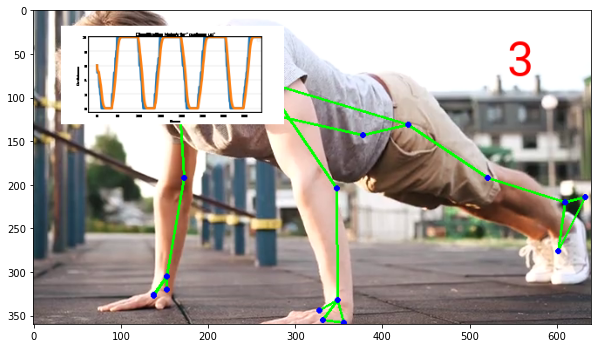

In [59]:
# Run classification on a video.
import os
import tqdm

from mediapipe.python.solutions import drawing_utils as mp_drawing


# Open output video.
out_video = cv2.VideoWriter(out_video_path, cv2.VideoWriter_fourcc(*'mp4v'), video_fps, (video_width, video_height))

frame_idx = 0
output_frame = None
with tqdm.tqdm(total=video_n_frames, position=0, leave=True) as pbar:
  while True:
    # Get next frame of the video.
    success, input_frame = video_cap.read()
    if not success:
      break

    # Run pose tracker.
    input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)
    result = pose_tracker.process(image=input_frame)
    pose_landmarks = result.pose_landmarks

    # Draw pose prediction.
    output_frame = input_frame.copy()
    if pose_landmarks is not None:
      mp_drawing.draw_landmarks(
          image=output_frame,
          landmark_list=pose_landmarks,
          connections=mp_pose.POSE_CONNECTIONS)
    
    if pose_landmarks is not None:
      # Get landmarks.
      frame_height, frame_width = output_frame.shape[0], output_frame.shape[1]
      pose_landmarks = np.array([[lmk.x * frame_width, lmk.y * frame_height, lmk.z * frame_width]
                                 for lmk in pose_landmarks.landmark], dtype=np.float32)
      assert pose_landmarks.shape == (33, 3), 'Unexpected landmarks shape: {}'.format(pose_landmarks.shape)

      # Classify the pose on the current frame.
      pose_classification = pose_classifier(pose_landmarks)

      # Smooth classification using EMA.
      pose_classification_filtered = pose_classification_filter(pose_classification)

      # Count repetitions.
      repetitions_count = repetition_counter(pose_classification_filtered)
    else:
      # No pose => no classification on current frame.
      pose_classification = None

      # Still add empty classification to the filter to maintaing correct
      # smoothing for future frames.
      pose_classification_filtered = pose_classification_filter(dict())
      pose_classification_filtered = None

      # Don't update the counter presuming that person is 'frozen'. Just
      # take the latest repetitions count.
      repetitions_count = repetition_counter.n_repeats

    # Draw classification plot and repetition counter.
    output_frame = pose_classification_visualizer(
        frame=output_frame,
        pose_classification=pose_classification,
        pose_classification_filtered=pose_classification_filtered,
        repetitions_count=repetitions_count)

    # Save the output frame.
    out_video.write(cv2.cvtColor(np.array(output_frame), cv2.COLOR_RGB2BGR))

    # Show intermediate frames of the video to track progress.
    if frame_idx % 50 == 0:
      show_image(output_frame)

    frame_idx += 1
    pbar.update()

# Close output video.
out_video.release()

# Release MediaPipe resources.
pose_tracker.close()

# Show the last frame of the video.
if output_frame is not None:
  show_image(output_frame)

In [60]:
# Download generated video
files.download(out_video_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>